In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_data.csv')

In [ ]:
df.head()

,user_id,name,course_order,seq,total_videos_watched,total_watch_time,total_videos_required
0,U_112,姚保峰,"[696994, 735338, 696956, 677020, 697027, 78857...","[{'video_id': 'V_1395633', 'segment': [{'start...",6.0,584.200,3505
1,U_150,韩明瑞,"[682155, 697374]","[{'video_id': 'V_6224262', 'segment': [{'start...",1.0,220.000,178
2,U_172,刘文博,"[948410, 936990, 1448497, 1471241, 697791, 676...","[{'video_id': 'V_6432959', 'segment': [{'start...",1.0,4.700,1177
3,U_189,张强,"[927961, 697334, 817148, 682155, 746971, 94325...","[{'video_id': 'V_6334508', 'segment': [{'start...",20.0,6058.000,1546
4,U_197,李超,"[697791, 676937, 1794464, 808526, 948415, 6941...","[{'video_id': 'V_1358540', 'segment': [{'start...",55.0,11304.248,394


In [ ]:
selected_df = df.drop(columns=['name', 'course_order', 'seq'])

In [ ]:
selected_df.head()

,user_id,total_videos_watched,total_watch_time,total_videos_required
0,U_112,6.0,584.200,3505
1,U_150,1.0,220.000,178
2,U_172,1.0,4.700,1177
3,U_189,20.0,6058.000,1546
4,U_197,55.0,11304.248,394


In [ ]:
selected_df['watch_ratio'] = selected_df['total_videos_watched'] / selected_df['total_videos_required']
selected_df['completion_status'] = selected_df['watch_ratio'].apply(lambda x: 1 if x > 0.4 else 0)
selected_df

,user_id,total_videos_watched,total_watch_time,total_videos_required,watch_ratio,completion_status
0,U_112,6.0,584.200,3505,0.001712,0
1,U_150,1.0,220.000,178,0.005618,0
2,U_172,1.0,4.700,1177,0.000850,0
3,U_189,20.0,6058.000,1546,0.012937,0
4,U_197,55.0,11304.248,394,0.139594,0
...,...,...,...,...,...,...
112374,U_26862793,1.0,60.100,171,0.005848,0
112375,U_26863000,3.0,289.000,2250,0.001333,0
112376,U_26863054,3.0,665.960,675,0.004444,0
112377,U_26863059,11.0,3915.000,796,0.013819,0


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
features = ['watch_ratio']
X = selected_df[features]
y = selected_df['completion_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Áp dụng SMOTE để cân bằng lại dữ liệu
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original training set size: {X_train.shape}, Resampled training set size: {X_train_resampled.shape}")

Original training set size: (78665, 1), Resampled training set size: (155094, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Chuẩn hóa dữ liệu huấn luyện
X_train_resampled = scaler.fit_transform(X_train_resampled)

# Chuẩn hóa dữ liệu kiểm tra
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Khởi tạo mô hình Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Khởi tạo param_grid để thử nghiệm các tham số khác nhau
param_grid = {
    'penalty': ['l1', 'l2'],  # Các kỹ thuật regularization
    'C': [0.1, 1, 10],         # Các giá trị cho độ mạnh regularization
    'solver': ['liblinear']    # Solver hỗ trợ penalty 'l1'
}
# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Huấn luyện GridSearchCV
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất
print("Best parameters found:", grid_search.best_params_)

# Mô hình tốt nhất
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best parameters found: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = best_model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with optimized model: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy with optimized model: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     33225
           1       1.00      0.14      0.24       489

    accuracy                           0.99     33714
   macro avg       0.99      0.57      0.62     33714
weighted avg       0.99      0.99      0.98     33714



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Dự đoán xác suất trên tập kiểm tra
y_prob = best_model.predict_proba(X_test)

# Xác suất cho các lớp 1
y_prob_class_1 = y_prob[:, 1]
y_prob_class_0 = y_prob[:, 0]
# In ra xác suất dự đoán
print("Xác suất dự đoán cho từng mẫu:")
print(y_prob)

Xác suất dự đoán cho từng mẫu:
[[1.00000000e+00 2.96618991e-12]
 [1.00000000e+00 1.65447070e-12]
 [1.00000000e+00 1.54755431e-12]
 ...
 [1.00000000e+00 1.79725705e-12]
 [1.00000000e+00 2.83612324e-11]
 [1.00000000e+00 1.54964368e-12]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

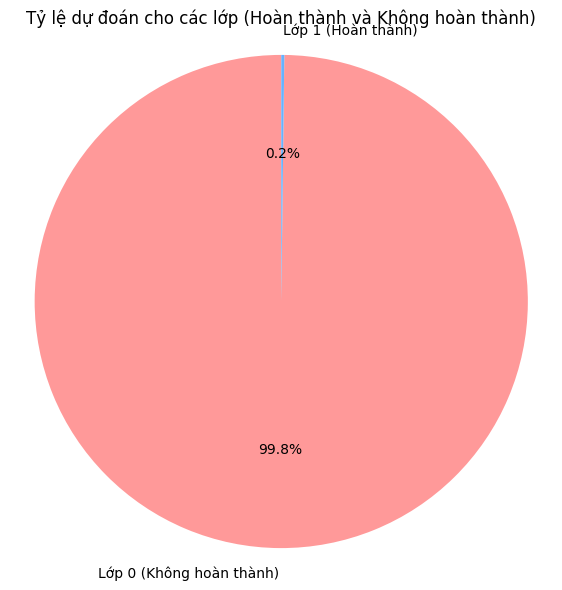

In [ ]:
# Lớp 1: Được dự đoán với xác suất > 0.5
y_pred_class_1 = (y_prob_class_1 > 0.5).sum()
y_pred_class_0 = (y_prob_class_1 <= 0.5).sum()

# Tạo biểu đồ tròn
labels = ['Lớp 0 (Không hoàn thành)', 'Lớp 1 (Hoàn thành)']
sizes = [y_pred_class_0, y_pred_class_1]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Tỷ lệ dự đoán cho các lớp (Hoàn thành và Không hoàn thành)")
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()